In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
# import data
raw_df = pd.read_csv('../Data/mtsamples.csv', index_col=0)
raw_df.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [17]:
print(raw_df.isnull().sum()) # check missing values
raw_df.dropna(subset=['transcription'], inplace=True) # drop rows with missing transcripts
#df_small = raw_df.sample(n=100, replace=False, random_state=42) # small sample to test on

description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64


Text(0, 0.5, 'Frequency')

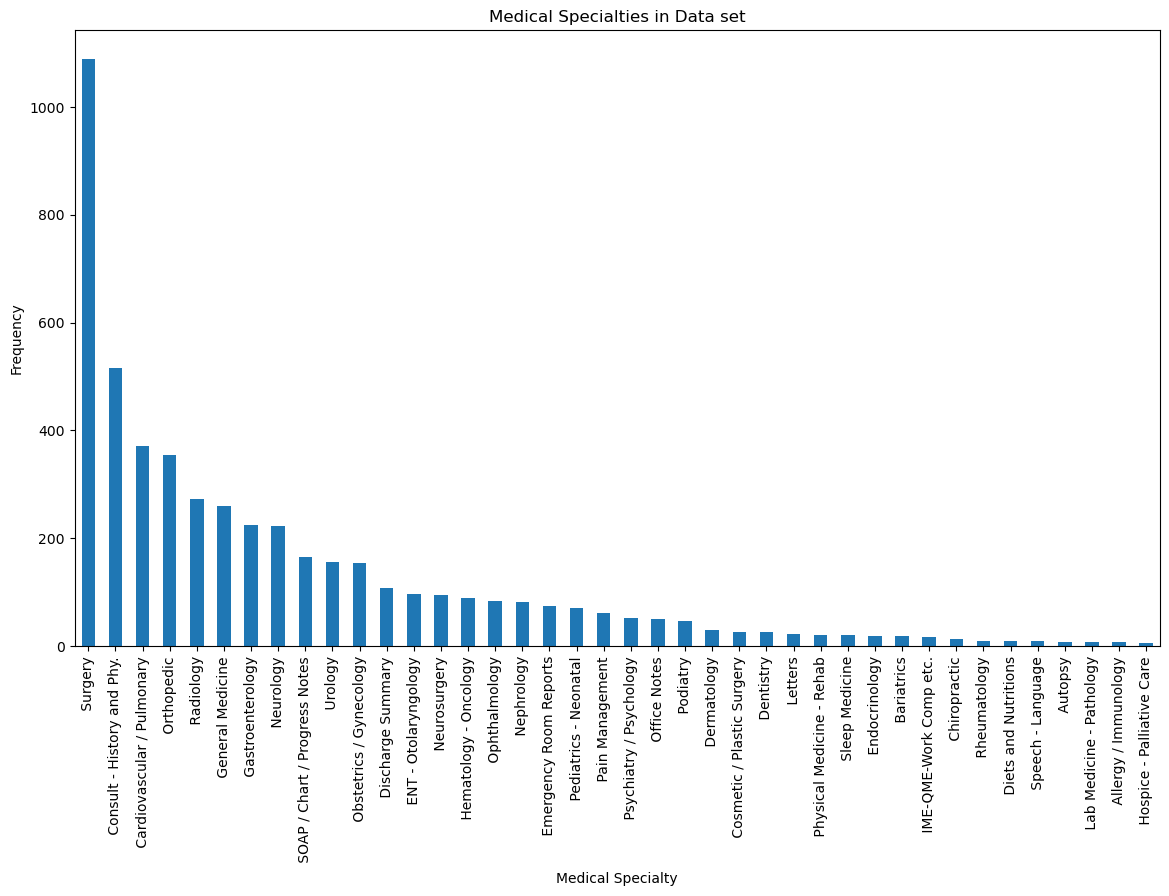

In [29]:
ax = raw_df['medical_specialty'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Medical Specialties in Data set")
ax.set_xlabel("Medical Specialty")
ax.set_ylabel("Frequency")

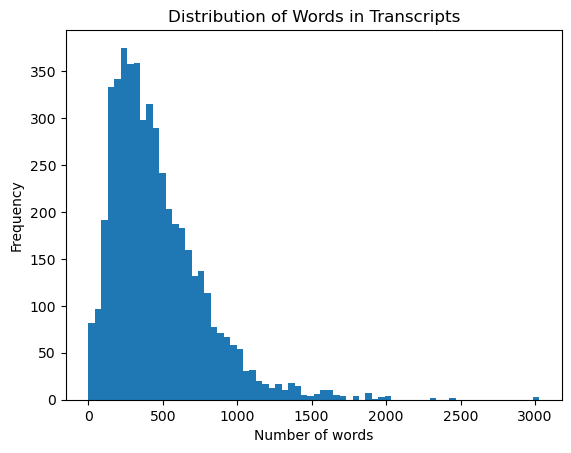

In [36]:
# how many words are in each transcript?
# calculate the number of words in each row of the transcription column
raw_df['num_words'] = raw_df['transcription'].apply(lambda x: len(x.split()))

# plot the distribution of the number of words
plt.hist(raw_df['num_words'], bins=70)
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.title('Distribution of Words in Transcripts')
plt.show()


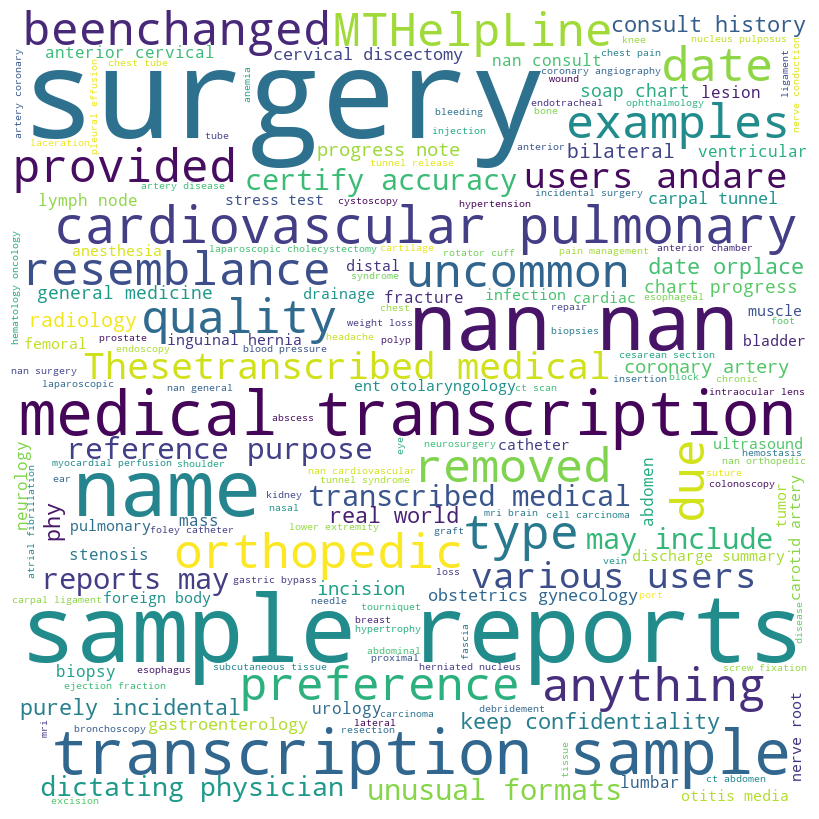

In [39]:
from wordcloud import WordCloud

# Concatenate all keywords into a single string separated by ', '
keywords_text = ', '.join(raw_df['keywords'].astype(str))

# Create the word cloud
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(keywords_text)

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()
